## Business questions to brainstorm:
What factors are contributing more to employee attrition?

What type of measures should the company take in order to retain their employees?

What business value does the model bring?

Will the model save lots of money?

Which business unit faces the attrition problem?

In [30]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from pylab import rcParams


import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carregando dados
data = pd.read_csv('dataset.csv')

In [3]:
#Verificando as 5 primeiras linhas
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source,AgeStartedWorking
0,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
1,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
2,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
3,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Marketing,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
4,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29


In [4]:
#Verificando o formato
data.shape

(23058, 30)

In [5]:
#Veriticando o tipo
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Employee Source     

In [6]:
#Verificando a variável Attrition
data['Attrition'].value_counts()

Current employee         19370
Voluntary Resignation     3601
Termination                 87
Name: Attrition, dtype: int64

In [7]:
#Verificando a variável Attrition
data['Education'].value_counts()

3    8930
4    6279
2    4436
1    2659
5     754
Name: Education, dtype: int64

In [8]:
#Verificando a variável BusinessTravel
data['BusinessTravel'].value_counts()

Travel_Rarely        16336
Travel_Frequently     4378
Non-Travel            2344
Name: BusinessTravel, dtype: int64

In [9]:
#Verificando a variável Department
data['Department'].value_counts()

Research & Development    15040
Sales                      7008
Human Resources            1010
Name: Department, dtype: int64

In [10]:
#Verificando a variável EducationField
data['EducationField'].value_counts()

Life Sciences       9513
Medical             7267
Marketing           2484
Technical Degree    2061
Other               1291
Human Resources      442
Name: EducationField, dtype: int64

In [11]:
#Verificando a variável Gender
data['Gender'].value_counts()

Male      13853
Female     9205
Name: Gender, dtype: int64

In [12]:
#Verificando a variável JobRole
data['JobRole'].value_counts()

Sales Executive              5067
Research Scientist           4591
Laboratory Technician        4112
Manufacturing Director       2346
Healthcare Representative    2069
Manager                      1521
Sales Representative         1307
Research Director            1212
Human Resources               833
Name: JobRole, dtype: int64

In [13]:
#Verificando a variável OverTime
data['OverTime'].value_counts()

No     16524
Yes     6534
Name: OverTime, dtype: int64

In [14]:
#Verificando a variável Employee Source
data['Employee Source'].value_counts()

Company Website    5327
Seek               3655
Indeed             2471
Jora               2408
LinkedIn           2294
Recruit.net        2283
GlassDoor          2136
Adzuna             2075
Referral            409
Name: Employee Source, dtype: int64

In [15]:
#Verificando a variável MaritalStatus
data['MaritalStatus'].value_counts()

Married     10543
Single       7352
Divorced     5163
Name: MaritalStatus, dtype: int64

In [16]:
#Verificando se há variáveis NaN
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Employee Source             0
AgeStartedWorking           0
dtype: int64

In [17]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source',
       'AgeStartedWorking'],
      dtype='object')

In [18]:
num_cols = ['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
           'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany', 
            'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager','AgeStartedWorking']

In [19]:
#Separando as variáveis qualitativas do dataset
#quali_df = data.select_dtypes(include=['object']).copy()
quali_df = data.drop(data[num_cols], axis=1)
quali_df = quali_df.apply(LabelEncoder().fit_transform)
quali_df.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Employee Source
0,2,2,2,1,1,1,0,2,1,7,3,2,1,0,0,0,0,7
1,2,2,0,3,0,0,0,2,1,7,3,2,1,1,0,0,0,7
2,2,2,2,1,1,1,0,2,1,7,3,2,1,0,0,0,0,7
3,2,2,0,3,2,0,0,2,1,7,3,2,1,0,0,0,0,7
4,2,2,0,3,0,0,0,2,1,7,3,2,1,0,0,0,0,7


Agora, vamos verificar a associação presente entre as variáveis qualitativas e a variável target. Para isso,
utilizamos a função Cramer-V.

In [20]:
# Função para calcular a associação entre variáveis categóricas
from scipy.stats import chi2_contingency
# Função
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Teste qui-quadrado de independência de variáveis em uma tabela de contingência.
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [21]:

# Coleta o nome das colunas do dataset

# Lista
categorical_vars = []

# Loop
for column in quali_df:
    categorical_vars.append(column)

In [22]:
y = 'Attrition'

# Print
print('\nA Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.')
print('\n')

# Loop
for var in categorical_vars:
    print('Associação da Variável ' + var + ' com a variável resposta:', 
          cramers_v(quali_df[var], quali_df[y]))


A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.


Associação da Variável Attrition com a variável resposta: 1.0
Associação da Variável BusinessTravel com a variável resposta: 0.09203282718197954
Associação da Variável Department com a variável resposta: 0.06048286790386135
Associação da Variável Education com a variável resposta: 0.033555087386196294
Associação da Variável EducationField com a variável resposta: 0.05581466411812143
Associação da Variável EnvironmentSatisfaction com a variável resposta: 0.03683266521388854
Associação da Variável Gender com a variável resposta: 0.00490266186371131
Associação da Variável JobInvolvement com a variável resposta: 0.05264029644414822
Associação da Variável JobLevel com a variável resposta: 0.08158943769439932
Associação da Variável JobRole com a variável resposta: 0.08348972881112551
Associação da Variável JobSatisfaction com a variável resposta: 0.045421601247107375
Associa

Podemos verificar uma forte associação entre a variável target (attrition) e a variável Overtime. Estudaremos
mais sobre essa relação no futuro. Notamos também que as variáveis Gender e PerformanceRating não parecem ter influência significativa.

Agora faremos a medida da correlação das variáveis quantitativas.

In [23]:
num_cols2 = ['Attrition','Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
           'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany', 
            'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager','AgeStartedWorking']

In [24]:
#Separando as variáveis quantitativas

quanti_df = data[num_cols2]
quanti_df.head()

,Attrition,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeStartedWorking
0,Voluntary Resignation,41,1,5993,8,11,8,0,6,4,0,5,33
1,Voluntary Resignation,37,6,5993,8,11,8,0,6,4,0,5,29
2,Voluntary Resignation,41,1,5993,4,11,8,0,6,4,0,5,33
3,Voluntary Resignation,37,6,5993,5,11,8,0,6,4,0,5,29
4,Voluntary Resignation,37,6,5993,8,11,8,0,6,4,0,5,29


In [25]:
#Transformando a variável target
quanti_df['Attrition'] = quanti_df['Attrition'].astype('category')
quanti_df['Attrition'] = quanti_df['Attrition'].cat.codes
quanti_df.head()

,Attrition,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeStartedWorking
0,2,41,1,5993,8,11,8,0,6,4,0,5,33
1,2,37,6,5993,8,11,8,0,6,4,0,5,29
2,2,41,1,5993,4,11,8,0,6,4,0,5,33
3,2,37,6,5993,5,11,8,0,6,4,0,5,29
4,2,37,6,5993,8,11,8,0,6,4,0,5,29


In [26]:
#Verificando as estatísticas básicas
quanti_df.describe()

,Attrition,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeStartedWorking
count,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000
mean,0.316116,37.035562,9.215413,6415.708561,2.690693,15.215630,11.074941,2.804016,6.910053,4.200755,2.164238,4.091335,25.960621
std,0.727016,9.050759,8.106362,4627.871795,2.499755,3.658836,7.565958,1.289432,5.969888,3.609138,3.200890,3.548117,9.384428
min,0.000000,18.000000,1.000000,1009.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,2.000000,2900.250000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,20.000000
50%,0.000000,36.000000,7.000000,4898.000000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,25.000000
75%,0.000000,43.000000,14.000000,8120.000000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,31.000000
max,2.000000,60.000000,29.000000,19999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000,60.000000


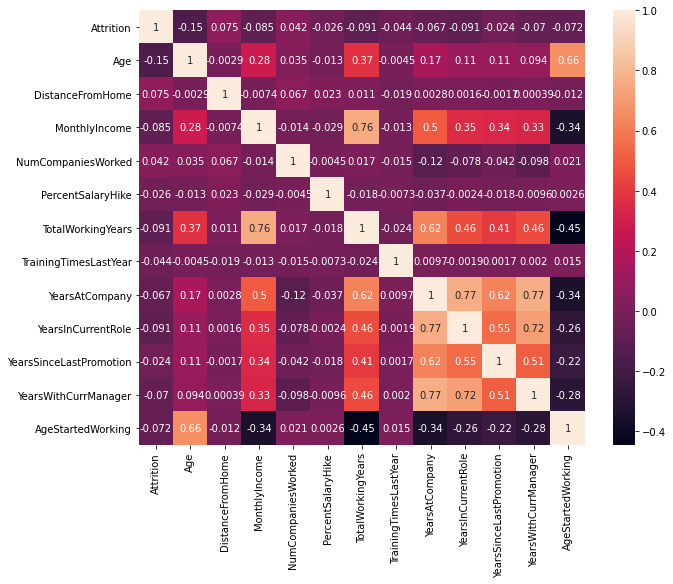

In [29]:
rcParams['figure.figsize'] = 10, 8
corr = quanti_df.corr()
sns.heatmap(corr, data=quanti_df, annot=True)

Não há uma alta correlação entre uma das variáveis e a variável target. Porém, vemos correlações altas
entre outras variáveis como:
    
* MonthlyIncome x TotalWorkingYears

* YearsAtCompany x TotalWorkingYears

* YearsInCurrentRole x YearsAtCompany

Entre outras...

V
    
    
